In [1]:
!pip install langgraph langsmith


In [2]:
!pip install langchain langchain_groq langchain_community

In [3]:
from google.colab import userdata

API_LANG_SMITH_KEY = userdata.get('API_LANG_SMITH_KEY')
GROQ_API_KEY = userdata.get('GROQ_API_KEY')


In [4]:
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = API_LANG_SMITH_KEY
os.environ["LANGCHAIN_PROJECT"] = "TestChatBot"



In [5]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="gemma2-9b-it", groq_api_key=GROQ_API_KEY)


# Start Building Chatbot

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages



In [7]:
class State(TypedDict):
  messages:Annotated[list, add_messages]


graph_builder=StateGraph(State)
graph_builder
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7c06ad06bc90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c06acf24f90>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [8]:
def chatbot(state:State):
  return {"messages":llm.invoke(state["messages"])}


In [9]:
graph_builder.add_node("chatbot",chatbot)


In [10]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)
graph_builder

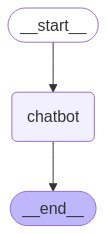

In [11]:
graph=graph_builder.compile()
graph

In [12]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Goodbye.")
    break
  for event in graph.stream({'messages':('user',user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value['messages'].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋 \n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 0.001921366, 'queue_time': 0.018731142, 'total_time': 0.031012275}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--8ab18b0d-a469-47e9-b290-ab5ef88c0d3c-0', usage_metadata={'input_tokens': 11, 'output_tokens': 16, 'total_tokens': 27})}])
content='Hello! 👋 \n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 0.001921366, 'queue_time': 0.018731142, 'total_time': 0.031012275}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run--8ab18